# Gradient Boosting

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rc("axes",unicode_minus = False) 

In [4]:
df_raw = pd.read_csv("./실습화일/2. Big Data 분석//HMEQ.csv", encoding='euc-kr')

df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

#데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
#생성된 더미변수 확인
df_raw_dummy.head()

#설명,목표 변수 데이터 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
#데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state=1234)
print("분할 전 설명변수 데이터:",df_raw_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18) Test (1125, 18)


In [5]:
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [6]:
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [7]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#max_depth:최대깊이 변경:1~10
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate, random_state =1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


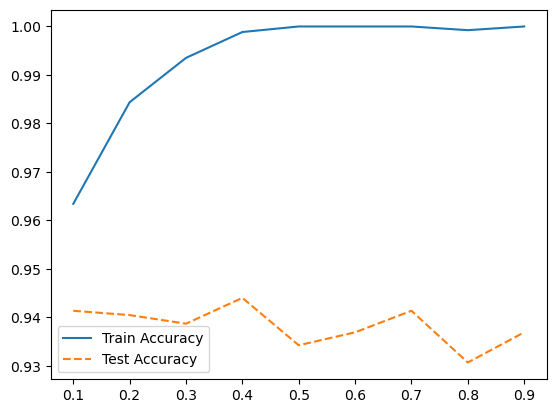

In [8]:
#모델 정확도 그래프 확인
plt.plot(para_lr, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_lr, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

학습률 0.1~0.3에서 세밀한 변화 확인 필요

In [9]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators =  v_n_estimators, learning_rate = 0.1,random_state =1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


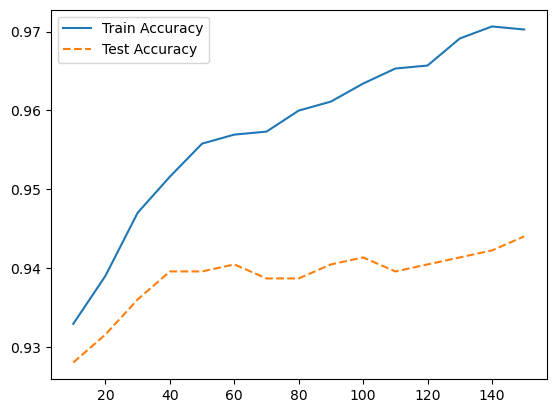

In [10]:
#모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

In [11]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#max_depth:최대깊이 변경:1~10
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100 ,learning_rate=0.1,random_state =1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.990,0.940
5,6,0.998,0.950
6,7,1.000,0.947
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


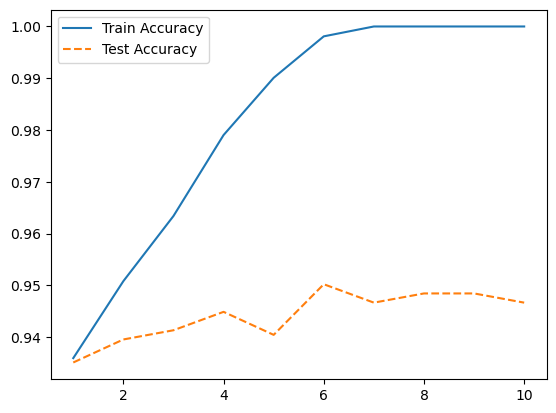

In [12]:
#모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

In [13]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#max_depth:최대깊이 변경:1~10
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                  max_depth = 6,n_estimators = 100,learning_rate=0.1, random_state =1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.996,0.946
1,20,0.995,0.942
2,30,0.994,0.940
3,40,0.992,0.945
4,50,0.992,0.942
5,60,0.989,0.947
6,70,0.988,0.943
7,80,0.986,0.944
8,90,0.987,0.945
9,100,0.984,0.944


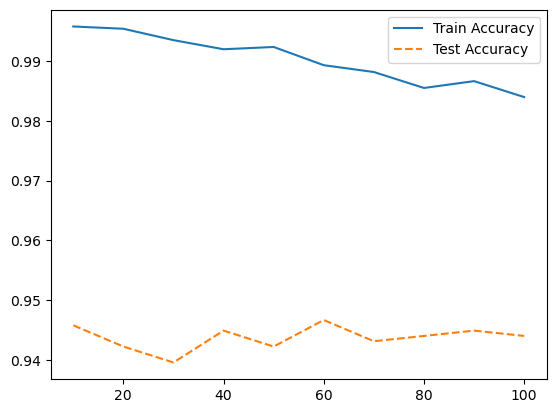

In [14]:
#모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_split, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

In [15]:
#min_sample_leaf 조정
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#max_depth:최대깊이 변경:1~10
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                  max_depth = 6,n_estimators = 100, learning_rate=0.1,random_state =1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.997,0.944
1,4,0.998,0.947
2,6,0.996,0.945
3,8,0.994,0.946
4,10,0.995,0.948
5,12,0.994,0.947
6,14,0.993,0.948
7,16,0.989,0.948
8,18,0.991,0.946
9,20,0.990,0.948


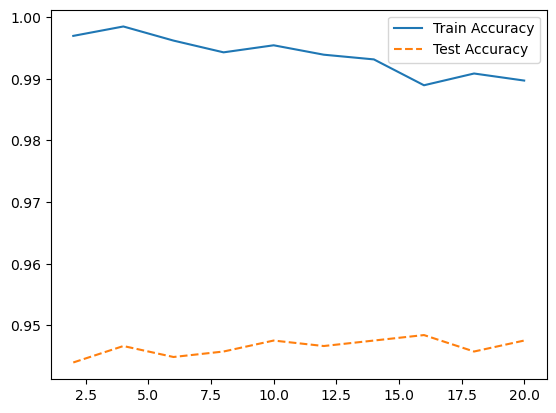

In [16]:
#모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

In [17]:
#최종 모델 선정
gb_final = GradientBoostingClassifier(max_depth = 6, min_samples_leaf = 15,n_estimators = 100, learning_rate=0.1,random_state = 1234)
gb_final.fit(df_train_x,df_train_y)
y_pred = gb_final.predict(df_test_x)
print("Accuracy on training set: {0:.3f}\n".format(gb_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(gb_final.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set: 0.991

Accuracy on test set: 0.949

Confusion matrix:
[[1020    1]
 [  56   48]]
              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



낮은 f1-score 는 Over-Sampling 을 통해 성능 향상 가능

In [18]:
v_feature_name = df_train_x.columns

# rf.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

#df_feature_importance의 테이브ㄹ을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.331
6,CLAGE,0.132
2,VALUE,0.105
5,DELINQ,0.096
8,CLNO,0.076
0,LOAN,0.069
3,YOJ,0.048
7,NINQ,0.041
1,MORTDUE,0.037
4,DEROG,0.035


Text(0, 0.5, '설명변수')

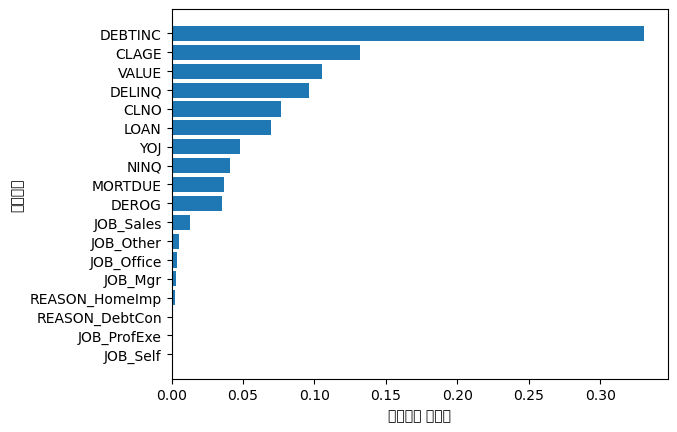

In [19]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [20]:
estimators = GradientBoostingClassifier(random_state=1234)

param_grid={'learning_rate':para_lr,'max_depth':para_depth, 'min_samples_leaf':para_leaf}
grid_gb = GridSearchCV(estimators,param_grid,scoring='accuracy',n_jobs=-1)
grid_gb.fit(df_train_x,df_train_y)
print('best estimators model:\n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
print('\nbest score:\n{}'.format(grid_gb.best_score_.round(3)))

best estimators model:
GradientBoostingClassifier(learning_rate=0.4, max_depth=10, min_samples_leaf=12,
                           random_state=1234)

best parameter:
{'learning_rate': 0.4, 'max_depth': 10, 'min_samples_leaf': 12}

best score:
0.958


In [21]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print("오차행렬: \n", confusion,'\n')
    print("정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1 : {:.4f}".format(F1))
    print("AUC : {:.4f}".format(AUC))

In [22]:
# CatBoost 빠른 장점이 있지만 범주형 데이터용으로 설계
# xgboost 활발한 커뮤니티가 있음

# XGBoost

In [23]:
xgboost_uncust = XGBClassifier(random_state=1234)
xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [24]:
xgboost_uncust.fit(df_train_x,df_train_y)
# train 예측 및 평가
print('\n 모델 생성 및 평가:Train \n')
xgb_pred_train = xgboost_uncust.predict(df_train_x)
eval_class_model(df_train_y,xgb_pred_train)
# test 예측 및 평가
print('\n 모델 생성 및 평가:Test \n')
xgb_pred_test = xgboost_uncust.predict(df_test_x)
eval_class_model(df_test_y,xgb_pred_test)


 모델 생성 및 평가:Train 

오차행렬: 
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1 : 1.0000
AUC : 1.0000

 모델 생성 및 평가:Test 

오차행렬: 
 [[1019    2]
 [  58   46]] 

정확도: 0.9467
정밀도: 0.9583
재현율: 0.4423
F1 : 0.6053
AUC : 0.7202


In [25]:
xgboost_user= XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=1234)
xgboost_user.fit(df_train_x,df_train_y)
xgb_pred_train = xgboost_user.predict(df_train_x)
print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y,xgb_pred_train)
print('\n',classification_report(df_train_y,xgb_pred_train))

xgb_pred_test = xgboost_user.predict(df_test_x)
print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y,xgb_pred_test)
print('\n',classification_report(df_test_y,xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬: 
 [[2382    0]
 [  49  192]] 

정확도: 0.9813
정밀도: 1.0000
재현율: 0.7967
F1 : 0.8868
AUC : 0.8983

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.80      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623


 사용자 모델 평가 : Test 

오차행렬: 
 [[1020    1]
 [  63   41]] 

정확도: 0.9431
정밀도: 0.9762
재현율: 0.3942
F1 : 0.5616
AUC : 0.6966

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.39      0.56       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



In [63]:
# early_stopping_rounds : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복횟수    88 + 150
eval_df = [(df_test_x,df_test_y)]
xgb_stop = XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=6,early_stopping_rounds=150,random_state=1234)
xgb_stop.fit(df_train_x,df_train_y, eval_metric='logloss',eval_set=eval_df,verbose=True)
print('최적 횟수:',xgb_stop.best_iteration)
print('최적 성능(0-Logloss):',xgb_stop.best_score)

[0]	validation_0-logloss:0.62092
[1]	validation_0-logloss:0.56184
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.47230
[4]	validation_0-logloss:0.43716
[5]	validation_0-logloss:0.40648
[6]	validation_0-logloss:0.38075
[7]	validation_0-logloss:0.35740
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32025
[10]	validation_0-logloss:0.30528
[11]	validation_0-logloss:0.29236
[12]	validation_0-logloss:0.28106
[13]	validation_0-logloss:0.27113
[14]	validation_0-logloss:0.26233
[15]	validation_0-logloss:0.25407
[16]	validation_0-logloss:0.24520
[17]	validation_0-logloss:0.23947
[18]	validation_0-logloss:0.23388
[19]	validation_0-logloss:0.22930
[20]	validation_0-logloss:0.22485
[21]	validation_0-logloss:0.22028
[22]	validation_0-logloss:0.21723
[23]	validation_0-logloss:0.21451
[24]	validation_0-logloss:0.21211
[25]	validation_0-logloss:0.20965
[26]	validation_0-logloss:0.20786
[27]	validation_0-logloss:0.20589
[28]	validation_0-logloss:0.20396
[29]	validation_0-loglos

[238]	validation_0-logloss:0.20722
최적 횟수: 88
최적 성능(0-Logloss): 0.18778899103175434


In [27]:
xgb_pred_stop = xgb_stop.predict(df_test_x)
print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y,xgb_pred_stop)
print('\n',classification_report(df_test_y,xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬: 
 [[1020    1]
 [  62   42]] 

정확도: 0.9440
정밀도: 0.9767
재현율: 0.4038
F1 : 0.5714
AUC : 0.7014

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.40      0.57       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



{'LOAN': 494.0, 'MORTDUE': 525.0, 'VALUE': 565.0, 'YOJ': 421.0, 'DEROG': 95.0, 'DELINQ': 208.0, 'CLAGE': 545.0, 'NINQ': 165.0, 'CLNO': 445.0, 'DEBTINC': 592.0, 'REASON_DebtCon': 63.0, 'JOB_Mgr': 20.0, 'JOB_Office': 50.0, 'JOB_Other': 75.0, 'JOB_ProfExe': 31.0, 'JOB_Sales': 57.0}


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

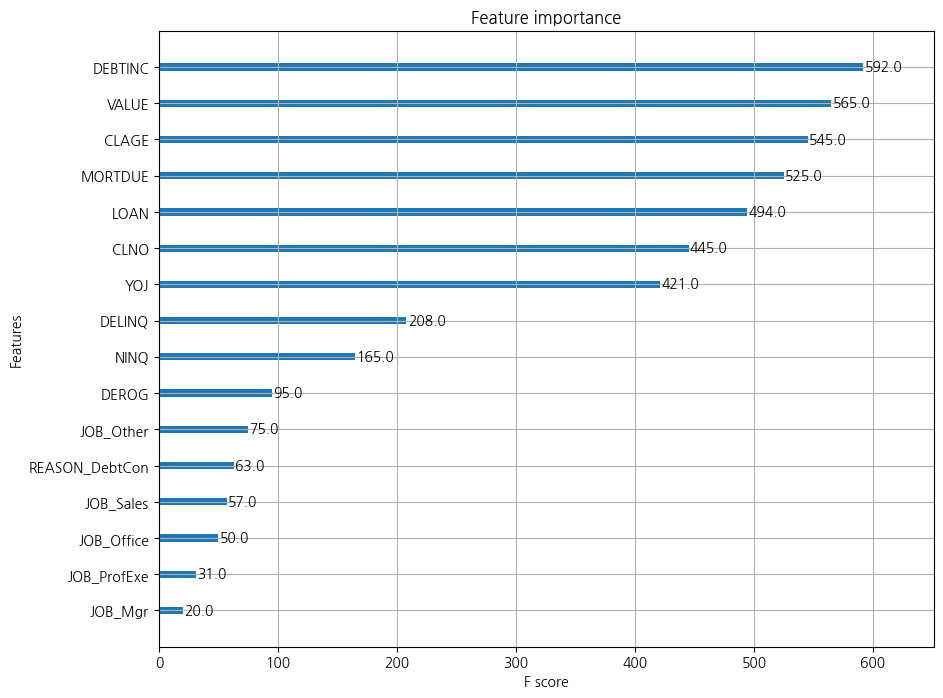

In [ ]:
from xgboost import plot_importance
print(xgb_stop.get_booster().get_fscore())
fig, ax =plt.subplots(figsize=(10,8))
plot_importance(xgb_stop,ax=ax)

# LightGBM

In [31]:
# !pip install lightgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [32]:
lgbm_uncust = LGBMClassifier(random_state=1234)
lgbm_uncust

LGBMClassifier(random_state=1234)

In [33]:
lgbm_uncust.fit(df_train_x,df_train_y)
print('\n 모델 생성 및 평가:Train \n')
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y,lgbm_pred_train)

print('\n 모델 생성 및 평가:Test \n')
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y,lgbm_pred_test)

[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899

 모델 생성 및 평가:Train 

오차행렬: 
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1 : 1.0000
AUC : 1.0000

 모델 생성 및 평가:Test 

오차행렬: 
 [[1019    2]
 [  59   45]] 

정확도: 0.9458
정밀도: 0.9574
재현율: 0.4327
F1 : 0.5960
AUC : 0.7154


In [45]:
lgbm_user= LGBMClassifier(n_estimators=100,learning_rate=0.1, random_state=1234)
lgbm_user.fit(df_train_x,df_train_y)
lgbm_pred_train = lgbm_user.predict(df_train_x)
print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y,lgbm_pred_train)
print('\n',classification_report(df_train_y,lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(df_test_x)
print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y,lgbm_pred_test)
print('\n',classification_report(df_test_y,lgbm_pred_test))

[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899

 사용자 모델 평가 : Train 

오차행렬: 
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1 : 1.0000
AUC : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2382
           1       1.00      1.00      1.00       241

    accuracy                           1.00      2623
   macro avg       1.00      1.00      1.00      2623
weighted avg       1.00      1.00      1.00      2623


 사용자 모델 평가 : Test 

오차행렬: 
 [[1019    2]
 [  59   45]] 



In [55]:
# early_stopping_rounds : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복횟수    
eval_df = [(df_test_x,df_test_y)]
lgbm_stop = LGBMClassifier(n_estimators=300,learning_rate=0.1,random_state=1234,early_stopping_rounds=200)
lgbm_stop.fit(df_train_x,df_train_y,eval_metric='logloss',eval_set=eval_df)
print('최적 횟수:',lgbm_stop.best_iteration_)
print('최적 성능(0-Logloss):',lgbm_stop.best_score_)

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 18
[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.184142
최적 횟수: 40
최적 성능(0-Logloss): defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDi

In [56]:
lgbm_pred_stop = lgbm_stop.predict(df_test_x)
print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y,lgbm_pred_stop)
print('\n',classification_report(df_test_y,lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬: 
 [[1020    1]
 [  60   44]] 

정확도: 0.9458
정밀도: 0.9778
재현율: 0.4231
F1 : 0.5906
AUC : 0.7110

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.42      0.59       104

    accuracy                           0.95      1125
   macro avg       0.96      0.71      0.78      1125
weighted avg       0.95      0.95      0.94      1125



['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[130 113 126 121  41  71 151  63 130 180  14   1   6  10  21   4  18   0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

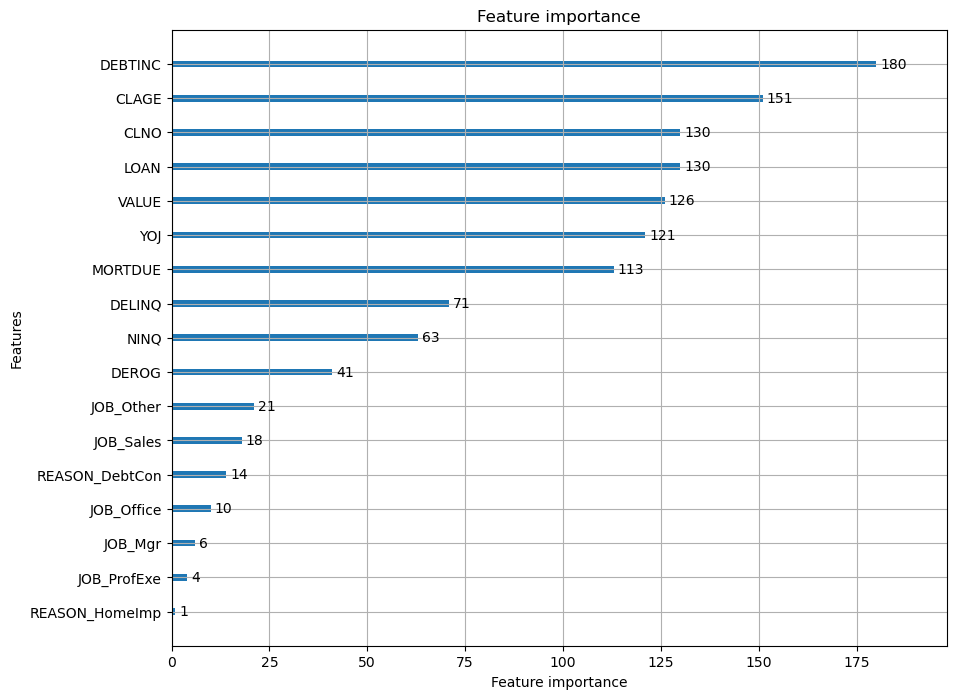

In [57]:
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)
fig, ax =plt.subplots(figsize=(10,8))
plot_importance(lgbm_stop,ax=ax)

## CatBoost (범주형 데이터)

### 특징
범주형 설명변수 자동 조합 및 분리 : 유사 특성의 변수를 합쳐서 분리에 사용

(예시 : 한국인의 머리색과 눈색은 대부분 "검정" -> 2변수 조합하여 사용)


In [58]:
# !pip install catboost
from catboost import CatBoostClassifier
# from lightgbm import plot_importance 미지원

In [59]:
cbc_uncust = CatBoostClassifier(random_state=1234) #eval_metric='logloss' 실행은 되는데 fit 과정에서 에러
cbc_uncust

In [60]:
cbc_uncust.fit(df_train_x,df_train_y)

print('\n 모델 생성 및 평가:Train \n')
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y,cbc_pred_train)

print('\n 모델 생성 및 평가:Test \n')
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y,cbc_pred_test)

Learning rate set to 0.015551
0:	learn: 0.6761244	total: 151ms	remaining: 2m 30s
1:	learn: 0.6579079	total: 152ms	remaining: 1m 16s
2:	learn: 0.6399682	total: 156ms	remaining: 51.8s
3:	learn: 0.6239700	total: 159ms	remaining: 39.6s
4:	learn: 0.6084344	total: 162ms	remaining: 32.2s
5:	learn: 0.5945777	total: 165ms	remaining: 27.3s
6:	learn: 0.5799344	total: 167ms	remaining: 23.7s
7:	learn: 0.5669553	total: 170ms	remaining: 21s
8:	learn: 0.5532509	total: 172ms	remaining: 18.9s
9:	learn: 0.5408740	total: 174ms	remaining: 17.2s
10:	learn: 0.5292223	total: 176ms	remaining: 15.8s
11:	learn: 0.5169985	total: 178ms	remaining: 14.7s
12:	learn: 0.5058216	total: 180ms	remaining: 13.7s
13:	learn: 0.4967484	total: 181ms	remaining: 12.8s
14:	learn: 0.4867250	total: 183ms	remaining: 12s
15:	learn: 0.4766792	total: 185ms	remaining: 11.4s
16:	learn: 0.4678698	total: 187ms	remaining: 10.8s
17:	learn: 0.4583963	total: 188ms	remaining: 10.3s
18:	learn: 0.4496975	total: 190ms	remaining: 9.82s
19:	learn: 0.

260:	learn: 0.1481033	total: 591ms	remaining: 1.67s
261:	learn: 0.1479149	total: 593ms	remaining: 1.67s
262:	learn: 0.1475370	total: 595ms	remaining: 1.67s
263:	learn: 0.1473996	total: 596ms	remaining: 1.66s
264:	learn: 0.1471146	total: 598ms	remaining: 1.66s
265:	learn: 0.1468904	total: 600ms	remaining: 1.66s
266:	learn: 0.1466664	total: 603ms	remaining: 1.66s
267:	learn: 0.1463970	total: 605ms	remaining: 1.65s
268:	learn: 0.1461858	total: 607ms	remaining: 1.65s
269:	learn: 0.1459469	total: 609ms	remaining: 1.65s
270:	learn: 0.1456424	total: 611ms	remaining: 1.64s
271:	learn: 0.1454420	total: 612ms	remaining: 1.64s
272:	learn: 0.1452990	total: 614ms	remaining: 1.64s
273:	learn: 0.1450226	total: 616ms	remaining: 1.63s
274:	learn: 0.1448775	total: 617ms	remaining: 1.63s
275:	learn: 0.1446350	total: 619ms	remaining: 1.62s
276:	learn: 0.1445271	total: 621ms	remaining: 1.62s
277:	learn: 0.1441849	total: 622ms	remaining: 1.62s
278:	learn: 0.1439275	total: 624ms	remaining: 1.61s
279:	learn: 

491:	learn: 0.1036690	total: 991ms	remaining: 1.02s
492:	learn: 0.1035093	total: 993ms	remaining: 1.02s
493:	learn: 0.1033651	total: 996ms	remaining: 1.02s
494:	learn: 0.1032051	total: 998ms	remaining: 1.02s
495:	learn: 0.1030263	total: 1000ms	remaining: 1.01s
496:	learn: 0.1028063	total: 1s	remaining: 1.01s
497:	learn: 0.1026991	total: 1s	remaining: 1.01s
498:	learn: 0.1025168	total: 1s	remaining: 1.01s
499:	learn: 0.1024252	total: 1.01s	remaining: 1.01s
500:	learn: 0.1022803	total: 1.01s	remaining: 1s
501:	learn: 0.1021669	total: 1.01s	remaining: 1s
502:	learn: 0.1019748	total: 1.01s	remaining: 1s
503:	learn: 0.1018080	total: 1.02s	remaining: 1s
504:	learn: 0.1017429	total: 1.02s	remaining: 998ms
505:	learn: 0.1016851	total: 1.02s	remaining: 996ms
506:	learn: 0.1015990	total: 1.02s	remaining: 994ms
507:	learn: 0.1014768	total: 1.02s	remaining: 992ms
508:	learn: 0.1012992	total: 1.03s	remaining: 990ms
509:	learn: 0.1011985	total: 1.03s	remaining: 988ms
510:	learn: 0.1009972	total: 1.0

714:	learn: 0.0738979	total: 1.39s	remaining: 553ms
715:	learn: 0.0737265	total: 1.39s	remaining: 552ms
716:	learn: 0.0736248	total: 1.39s	remaining: 550ms
717:	learn: 0.0735268	total: 1.39s	remaining: 548ms
718:	learn: 0.0734757	total: 1.4s	remaining: 546ms
719:	learn: 0.0732800	total: 1.4s	remaining: 544ms
720:	learn: 0.0731742	total: 1.4s	remaining: 542ms
721:	learn: 0.0730865	total: 1.4s	remaining: 540ms
722:	learn: 0.0730045	total: 1.4s	remaining: 538ms
723:	learn: 0.0729210	total: 1.41s	remaining: 536ms
724:	learn: 0.0728335	total: 1.41s	remaining: 534ms
725:	learn: 0.0727235	total: 1.41s	remaining: 532ms
726:	learn: 0.0726599	total: 1.41s	remaining: 530ms
727:	learn: 0.0725913	total: 1.41s	remaining: 527ms
728:	learn: 0.0724967	total: 1.41s	remaining: 525ms
729:	learn: 0.0723458	total: 1.41s	remaining: 523ms
730:	learn: 0.0721751	total: 1.42s	remaining: 521ms
731:	learn: 0.0721346	total: 1.42s	remaining: 519ms
732:	learn: 0.0720702	total: 1.42s	remaining: 517ms
733:	learn: 0.071

954:	learn: 0.0530614	total: 1.79s	remaining: 84.2ms
955:	learn: 0.0530393	total: 1.79s	remaining: 82.4ms
956:	learn: 0.0529859	total: 1.79s	remaining: 80.5ms
957:	learn: 0.0529668	total: 1.79s	remaining: 78.6ms
958:	learn: 0.0529546	total: 1.79s	remaining: 76.7ms
959:	learn: 0.0529092	total: 1.8s	remaining: 74.9ms
960:	learn: 0.0528928	total: 1.8s	remaining: 73ms
961:	learn: 0.0528436	total: 1.8s	remaining: 71.1ms
962:	learn: 0.0527786	total: 1.8s	remaining: 69.2ms
963:	learn: 0.0526848	total: 1.8s	remaining: 67.3ms
964:	learn: 0.0526144	total: 1.8s	remaining: 65.5ms
965:	learn: 0.0525785	total: 1.81s	remaining: 63.6ms
966:	learn: 0.0525225	total: 1.81s	remaining: 61.7ms
967:	learn: 0.0524917	total: 1.81s	remaining: 59.8ms
968:	learn: 0.0524401	total: 1.81s	remaining: 58ms
969:	learn: 0.0523664	total: 1.81s	remaining: 56.1ms
970:	learn: 0.0523216	total: 1.81s	remaining: 54.2ms
971:	learn: 0.0522613	total: 1.82s	remaining: 52.3ms
972:	learn: 0.0522070	total: 1.82s	remaining: 50.5ms
973

In [61]:
cbc_user= CatBoostClassifier(n_estimators=200,learning_rate=0.1,max_depth=6,random_state=1234)
cbc_user.fit(df_train_x,df_train_y)
cbc_pred_train = cbc_user.predict(df_train_x)
print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y,cbc_pred_train)
print('\n',classification_report(df_train_y,cbc_pred_train))

cbc_pred_test = cbc_user.predict(df_test_x)
print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y,cbc_pred_test)
print('\n',classification_report(df_test_y,cbc_pred_test))

0:	learn: 0.5909199	total: 2.04ms	remaining: 405ms
1:	learn: 0.5032732	total: 3.78ms	remaining: 375ms
2:	learn: 0.4353241	total: 5.47ms	remaining: 359ms
3:	learn: 0.3862375	total: 7.18ms	remaining: 352ms
4:	learn: 0.3517100	total: 8.85ms	remaining: 345ms
5:	learn: 0.3239240	total: 10.5ms	remaining: 340ms
6:	learn: 0.3018276	total: 12.1ms	remaining: 333ms
7:	learn: 0.2850184	total: 13.6ms	remaining: 327ms
8:	learn: 0.2697382	total: 15.4ms	remaining: 326ms
9:	learn: 0.2581893	total: 17ms	remaining: 323ms
10:	learn: 0.2468526	total: 18.5ms	remaining: 318ms
11:	learn: 0.2364921	total: 20.1ms	remaining: 315ms
12:	learn: 0.2284698	total: 21.7ms	remaining: 313ms
13:	learn: 0.2239990	total: 23.4ms	remaining: 311ms
14:	learn: 0.2174115	total: 25.1ms	remaining: 309ms
15:	learn: 0.2116582	total: 26.7ms	remaining: 307ms
16:	learn: 0.2067886	total: 28.3ms	remaining: 305ms
17:	learn: 0.2039374	total: 29.9ms	remaining: 303ms
18:	learn: 0.1986265	total: 31.6ms	remaining: 301ms
19:	learn: 0.1962122	tot

164:	learn: 0.0483899	total: 272ms	remaining: 57.7ms
165:	learn: 0.0481620	total: 274ms	remaining: 56.1ms
166:	learn: 0.0476459	total: 276ms	remaining: 54.5ms
167:	learn: 0.0470195	total: 278ms	remaining: 52.9ms
168:	learn: 0.0464791	total: 280ms	remaining: 51.3ms
169:	learn: 0.0463761	total: 281ms	remaining: 49.6ms
170:	learn: 0.0462441	total: 283ms	remaining: 48ms
171:	learn: 0.0457113	total: 284ms	remaining: 46.3ms
172:	learn: 0.0451182	total: 286ms	remaining: 44.6ms
173:	learn: 0.0446107	total: 288ms	remaining: 43ms
174:	learn: 0.0445403	total: 289ms	remaining: 41.3ms
175:	learn: 0.0444598	total: 291ms	remaining: 39.7ms
176:	learn: 0.0443139	total: 292ms	remaining: 38ms
177:	learn: 0.0440213	total: 294ms	remaining: 36.3ms
178:	learn: 0.0437042	total: 296ms	remaining: 34.7ms
179:	learn: 0.0435536	total: 297ms	remaining: 33ms
180:	learn: 0.0433930	total: 299ms	remaining: 31.3ms
181:	learn: 0.0433312	total: 300ms	remaining: 29.7ms
182:	learn: 0.0431364	total: 302ms	remaining: 28ms
183

In [68]:
# early_stopping_rounds : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복횟수    
eval_df = [(df_test_x,df_test_y)]
cbc_stop = CatBoostClassifier(n_estimators=300,learning_rate=0.1,max_depth=6,early_stopping_rounds=150,random_state=1234)
cbc_stop.fit(df_train_x,df_train_y, eval_set=eval_df,verbose=True) # eval_metric 가 인자인식 못함
print('최적 횟수:',cbc_stop.best_iteration)
print('최적 성능(0-Logloss):',cbc_stop.best_score)

0:	learn: 0.5909199	test: 0.5906622	best: 0.5906622 (0)	total: 3.49ms	remaining: 1.04s
1:	learn: 0.5032732	test: 0.5053610	best: 0.5053610 (1)	total: 5.9ms	remaining: 879ms
2:	learn: 0.4353241	test: 0.4377785	best: 0.4377785 (2)	total: 8.05ms	remaining: 798ms
3:	learn: 0.3862375	test: 0.3906700	best: 0.3906700 (3)	total: 10.2ms	remaining: 754ms
4:	learn: 0.3517100	test: 0.3599815	best: 0.3599815 (4)	total: 12.4ms	remaining: 730ms
5:	learn: 0.3239240	test: 0.3335359	best: 0.3335359 (5)	total: 14.9ms	remaining: 731ms
6:	learn: 0.3018276	test: 0.3128835	best: 0.3128835 (6)	total: 17.1ms	remaining: 716ms
7:	learn: 0.2850184	test: 0.2972508	best: 0.2972508 (7)	total: 19.5ms	remaining: 710ms
8:	learn: 0.2697382	test: 0.2841419	best: 0.2841419 (8)	total: 21.8ms	remaining: 704ms
9:	learn: 0.2581893	test: 0.2748417	best: 0.2748417 (9)	total: 23.9ms	remaining: 694ms
10:	learn: 0.2468526	test: 0.2659877	best: 0.2659877 (10)	total: 26ms	remaining: 683ms
11:	learn: 0.2364921	test: 0.2571756	best: 0

119:	learn: 0.0715765	test: 0.1761826	best: 0.1757806 (103)	total: 202ms	remaining: 302ms
120:	learn: 0.0705244	test: 0.1758351	best: 0.1757806 (103)	total: 203ms	remaining: 301ms
121:	learn: 0.0697048	test: 0.1761106	best: 0.1757806 (103)	total: 205ms	remaining: 299ms
122:	learn: 0.0690290	test: 0.1761127	best: 0.1757806 (103)	total: 207ms	remaining: 297ms
123:	learn: 0.0684572	test: 0.1759818	best: 0.1757806 (103)	total: 208ms	remaining: 296ms
124:	learn: 0.0672503	test: 0.1761924	best: 0.1757806 (103)	total: 210ms	remaining: 294ms
125:	learn: 0.0670152	test: 0.1757893	best: 0.1757806 (103)	total: 212ms	remaining: 293ms
126:	learn: 0.0665885	test: 0.1755236	best: 0.1755236 (126)	total: 213ms	remaining: 291ms
127:	learn: 0.0659947	test: 0.1756546	best: 0.1755236 (126)	total: 215ms	remaining: 289ms
128:	learn: 0.0652586	test: 0.1756194	best: 0.1755236 (126)	total: 217ms	remaining: 288ms
129:	learn: 0.0647615	test: 0.1756993	best: 0.1755236 (126)	total: 219ms	remaining: 286ms
130:	learn

244:	learn: 0.0269306	test: 0.1810442	best: 0.1748131 (154)	total: 398ms	remaining: 89.5ms
245:	learn: 0.0267980	test: 0.1811748	best: 0.1748131 (154)	total: 400ms	remaining: 87.9ms
246:	learn: 0.0267083	test: 0.1813041	best: 0.1748131 (154)	total: 402ms	remaining: 86.2ms
247:	learn: 0.0265639	test: 0.1812891	best: 0.1748131 (154)	total: 404ms	remaining: 84.6ms
248:	learn: 0.0263502	test: 0.1813781	best: 0.1748131 (154)	total: 405ms	remaining: 83ms
249:	learn: 0.0262506	test: 0.1813500	best: 0.1748131 (154)	total: 407ms	remaining: 81.4ms
250:	learn: 0.0260525	test: 0.1814189	best: 0.1748131 (154)	total: 409ms	remaining: 79.8ms
251:	learn: 0.0259103	test: 0.1814899	best: 0.1748131 (154)	total: 410ms	remaining: 78.2ms
252:	learn: 0.0257950	test: 0.1817613	best: 0.1748131 (154)	total: 412ms	remaining: 76.5ms
253:	learn: 0.0256851	test: 0.1818544	best: 0.1748131 (154)	total: 414ms	remaining: 74.9ms
254:	learn: 0.0255721	test: 0.1818213	best: 0.1748131 (154)	total: 415ms	remaining: 73.3ms
2

AttributeError: 'CatBoostClassifier' object has no attribute 'best_iteration'

In [69]:
cbc_pred_stop = cbc_stop.predict(df_test_x)
print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y,cbc_pred_stop)
print('\n',classification_report(df_test_y,cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬: 
 [[1021    0]
 [  56   48]] 

정확도: 0.9502
정밀도: 1.0000
재현율: 0.4615
F1 : 0.6316
AUC : 0.7308

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       1.00      0.46      0.63       104

    accuracy                           0.95      1125
   macro avg       0.97      0.73      0.80      1125
weighted avg       0.95      0.95      0.94      1125



In [70]:
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)

df_cbc_importance = pd.DataFrame()
df_cbc_importance['Feature'] = cbc_stop.feature_names_
df_cbc_importance['Importance'] = cbc_stop.feature_importances_

df_cbc_importance.sort_values('Importance',ascending=False, inplace=True)
df_cbc_importance.round(3)


['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 8.48192368 10.1545335   6.99018232 10.55202983  2.79864521  7.93223236
 12.19986926  6.62398258  9.80529685 13.95290347  0.74700744  1.10396813
  1.58618178  1.59255053  2.00890259  2.25362825  1.01649621  0.19966599]


,Feature,Importance
9,DEBTINC,13.953
6,CLAGE,12.200
3,YOJ,10.552
1,MORTDUE,10.155
8,CLNO,9.805
0,LOAN,8.482
5,DELINQ,7.932
2,VALUE,6.990
7,NINQ,6.624
4,DEROG,2.799


Text(0, 0.5, '설명변수')

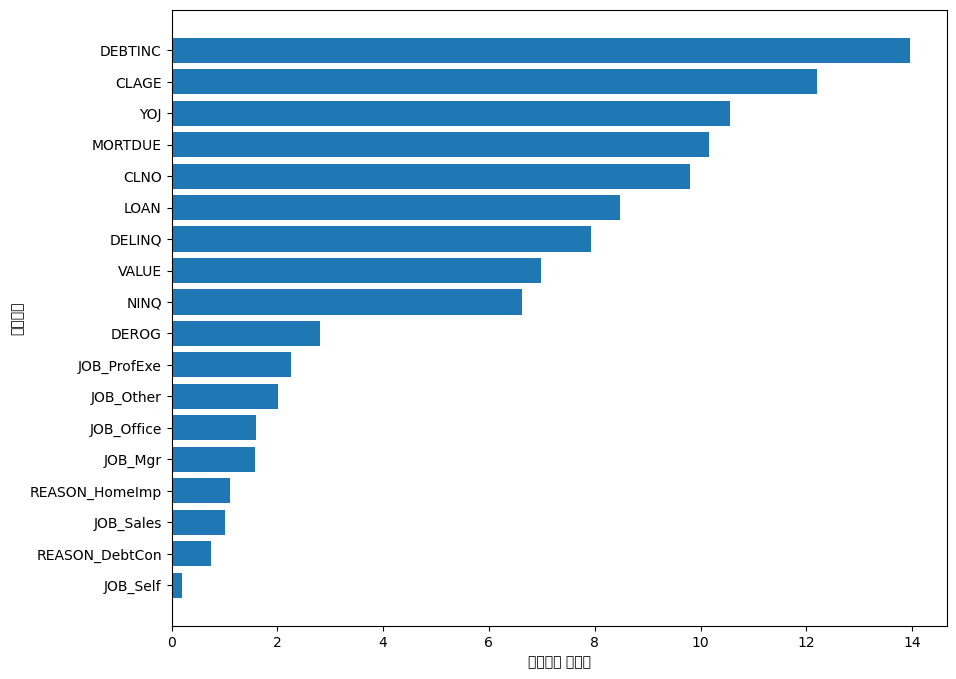

In [71]:
fig, ax =plt.subplots(figsize=(10,8))
df_cbc_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates = range(len(df_cbc_importance))
plt.barh(y=coordinates,width=df_cbc_importance['Importance'])
plt.yticks(coordinates,df_cbc_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')